<a href="https://colab.research.google.com/github/RautenM/PythonFundamentals/blob/main/Project*/Project_Sea_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Correlation between time data and sea level rise***



Sea levels are highly variable over periods ranging from seconds to decades. Sea-level rise is the rising trend averaged over longer periods, which is observed at many coastal stations since a few centuries. It is almost certain that global warming due to human emissions of greenhouse gases is responsible for steepening this trend over the last few decades...

Study of the data and main descriptors


Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. 
This data contains "cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements.

The data describes annual sea levels from 1880 to 2013. Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)
In 2020, global sea level set a new record high—91.3 mm (3.6 inches) above 1993 levels.

In this project I am going to demonstrate the Correlation coefficient between year and the rise in sea level

First I am going to read the csv Raw Data file: https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv into dataframe called sea_level_df. 

I will using pandas and numpy library and look at sea-levels from the year 1880 to 2013.

Then I will also display technical and numerical summary to inspect the data and the column data types. 

In [2]:
sea_level_df.head()

#printing first 5 rows of sea_level_df#

NameError: ignored

In [3]:
import pandas as pd
import numpy as np

url = ("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
sea_level_df = pd.read_csv(url)
sea_level_df


#reading data into sea_level_df dataframe#

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


I am looking at the data and see that it contains some empty cells ("NOAA Adjusted Sea Level"from row 0 to 112 )I will use drop function to drop off those columns and prepare my data to apply some functions later on.

In [4]:
sea_level_df.drop(columns=['NOAA Adjusted Sea Level'])

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880,0.000000,-0.952756,0.952756
1,1881,0.220472,-0.732283,1.173228
2,1882,-0.440945,-1.346457,0.464567
3,1883,-0.232283,-1.129921,0.665354
4,1884,0.590551,-0.283465,1.464567
...,...,...,...,...
129,2009,8.586614,8.311024,8.862205
130,2010,8.901575,8.618110,9.185039
131,2011,8.964567,8.661417,9.267717
132,2012,9.326772,8.992126,9.661417


In [5]:
sea_level_df.info()

#printing numerical statistics#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


I am looking at 134 records and 5 columns (Year, CSIRO Adjusted Sea Level,	Lower Error Bound,	Upper Error Bound,	NOAA Adjusted Sea Level) 4 of the columns are floats, 1 is integers. 


In [6]:
sea_level_df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


I am interested to do some statistic on the level arraysee and see the avareage, maximun and minumum level of the sea.

The fact that the arrays are aligned will help me to display the year with the biggest rise in level and the year with the lowest rise in level. To do this I will use the numpy function and print the first value.

To check probability I will calculate the correlation coefficient between year and the rise in sea level and rounded to 2 decimal places.

In [7]:
def get_level():
  year = sea_level_df["Year"].to_numpy(np.int64)
  level =sea_level_df["CSIRO Adjusted Sea Level"].to_numpy(np.float64) 

  avg_level = level.mean()
  std = level.std()
  sum = level.sum()
  max = level.max()
  min = level.min() 
  
  print("Mean",avg_level, "Std", std, "Total",sum, "Highest sea level",max, "Lowest sea level",min)


  highest_sea_rise_year = np.where(level == max)[0][0]
  lowest_sea_rise_year = np.where(sea_level_df == min)[0][0]

  print(year[highest_sea_rise_year])
  print(year[lowest_sea_rise_year])

 

  coeff =np. corrcoef(year,level)
  print(round(coeff[0][1],2))



get_level()


Mean 3.650340811880598 Std 2.476399631426498 Total 489.1456687920001 Highest sea level 9.326771644 Lowest sea level -0.440944881
2012
1882
0.98


First number gives us the yearly measurements of sea levels over a period of a few years at various locations over the globe, and then averaging all of the measurements in that way we got the mean. 

Secound number is called standard deviation to understand how dispersed the data is in relation to the mean.

We can also see that the lowest sea level -0.4 we have experianced in 1882 and the highest 9.3 in 2021.

The last number is scary as it indicating a strong correlation coefficients between time and rise in sea level...



# Dose the sea rise each year?!

Matplotlib library will help me to look at this number in more visual way by ploting years and sea level and display correlation plot

In [8]:
sea_levels_df = np.array(sea_level_df["CSIRO Adjusted Sea Level"],np.float64)
sea_years = np.array(sea_level_df["Year"],np.int64)

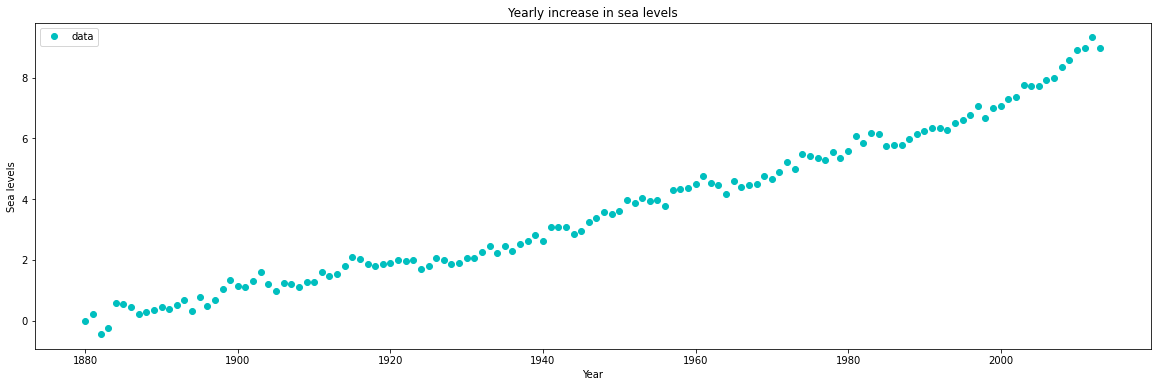

In [21]:
import matplotlib.pyplot as plt

def visualise_oneplot(x_array,y_array,x_label,y_label,plot_title):
  plt.figure(figsize=(20,6))
  plt.plot(x_array, y_array, 'o', color = 'c', label='data') 
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

fig1 = visualise_oneplot(sea_years, sea_levels_df,"Year","Sea levels","Yearly increase in sea levels")



The correlation coefficients between significant sea level and year prove the correlation number from above and show us that our two variables Sea Level and Year move in the same direction, and those variables are saying that we are looking at a positive correlation which means that there is evidence that the sea level is rapidly rising each year.
Base on this grapf we can predict that if we don't take any action to tackle the problem the sea level will rise each year and other way around, if we take the right actions the sea level will slow down. 

# Reflection
----

## What skills have you demonstrated in completing this notebook?

I have used basic functions to read  technical and numerical statistics and correlation visualisations. I also have used theoretical knowlage to explain my project.

## What caused you the most difficulty?


I wasnt able to invest as much time in the project as I would have liked.